# Importing Modules

In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import missingno

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleansing

In this part of the analysis I will look for duplicate rows, empty rows and anything that I may need to remove or update from the dataframe before we beginning working with the dataset.

In [2]:
# loading the automobile dataset into a dataframe
auto_df = pd.read_csv('automobile.txt')

auto_df.columns # columns in the dataframe

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [49]:
pd.set_option('display.max_columns', None)
auto_df.head(2) # first two rows

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,138,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,138,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


From the information above we can see that our dataframe has 26 columns in total and from the information below we can see that it also has a total of 205 rows.

In [4]:
auto_df.tail(2) # last 2 rows

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
auto_df.shape # dimensions of the dataframe

(205, 26)

The shape confirms the number of rows and columns in the dataframe.We can now conclude that there are no empty rows from the top or the bottom of the the dataframe. Now we need to check and remove any duplicate rows that can be found in our dataframe.

In [6]:
# removing duplicate rows
auto_df.drop_duplicates(keep='first')

auto_df.shape

(205, 26)

There are no duplicate rows that could be found, and below we can see that there are no columns with completely empty rows but we know that there is missing data in the dataframe that is represented by '?'. We need to replace all occurrences of '?' with 'NaN'.

In [7]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
# replacing all ? with NaN
auto_df.replace('?', np.NaN, inplace = True)

In [9]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

From above we can see that the number of non-null values have dropped but still none of the columns are completely empty. Before we deal with missing data we need to deal with the datatypes of some of these columns. The following columns 'bore','stroke','horsepower','peak-rpm','price' and 'normalized-losses' have numerical values and the datatype should be a 'float' or 'int'. 

Below I will correct the datatypes for the following columns 'bore','stroke','horsepower','peak-rpm','price' and for 'normalized-losses' I will deal with it after handling missing data.

In [10]:
# columns to update datatype on
colum = ['bore','stroke','horsepower','peak-rpm','price']

auto_df[colum] = auto_df[colum].astype('float') # updating 

auto_df.info() # viewing colum info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Now that we have dealt with cleaning the data, we can move on to handling missing values with the suitable form of imputation. From above we can see that seven of the colums have missing data and this needs to be investigated.

#  Handling Missing Data

First thing to do is to locate the missing data in the dataframe, a visualisation of the dataframe will make it is easier to get a quick sense of the spread of the missing data and which columns have a lot of missing data.

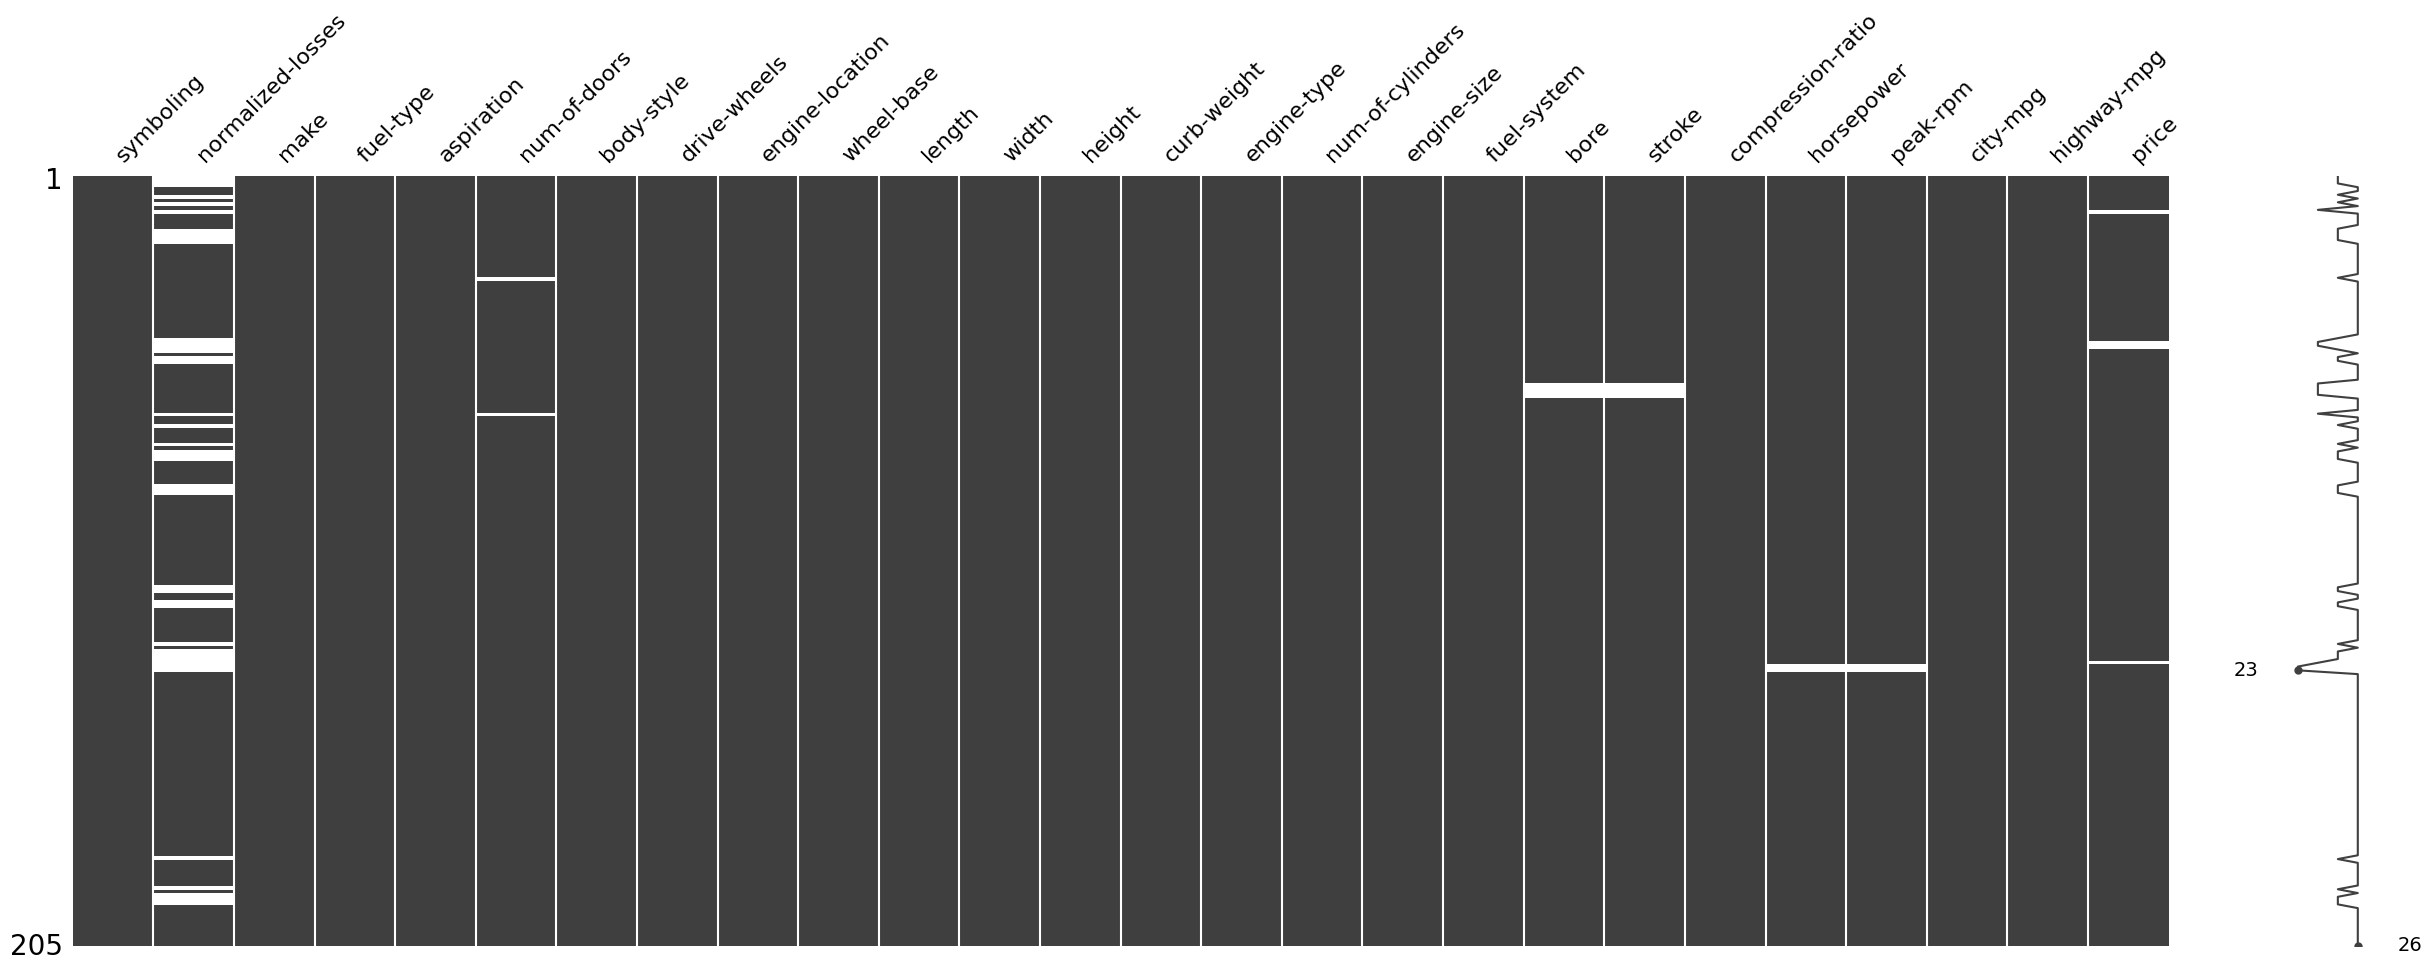

In [11]:
# Plot graphic of missing values
missingno.matrix(auto_df, figsize = (30,10));

In the plot above we can see that the missing data is in seven columns with most of the missing data is in the normalized-losses column. Below I will check the actual numbers of these missing datapoint and the extent of their effect on the dataset.

In [12]:
# getting the number of missing data points per column
missing_datapoints = auto_df.isnull().sum()

# number of missing data points in the columns
missing_datapoints[missing_datapoints != 0]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [13]:
# getting the total number of cells 
total = np.product(auto_df.shape)

# gettng total number of missing data points
missing_data_total = missing_datapoints.sum()

# checking the percentage of missing data
percent = f"{round((missing_data_total/total)*100,2)}%"

print("Percentage of missing datapoints is",percent)

Percentage of missing datapoints is 1.11%


It seems less than 2% of the data points are missing, so we can still work with this dataset. Now we need to decide on how to handle the missing data.

for the columns below missing data will be handled with similar case imputation of the mean or median since these are numerical variables.
- normalized-losses
- bore
- stroke
- horsepower
- peak-rpm
- price

And for the 'num-of-doors' column I will do imputation with the mode since this is a categorical variable.

### Imputation Of Missing Data

In [14]:
# imputation for 'num-of-doors' column
auto_df['num-of-doors'].fillna(auto_df['num-of-doors'].mode()[0], inplace = True)

# grouping price and getting the median price
price = auto_df.groupby('make')['price'].transform('median')

# similar case imputation of the median
auto_df['price'].fillna(price, inplace = True)

# grouping peak rpm by 'num-of-doors' and 'body-style'
rpm = auto_df.groupby(['num-of-doors','body-style'])['peak-rpm'].transform('median')

# similar case imputation of the median
auto_df['peak-rpm'].fillna(rpm, inplace = True)

# grouping horsepower by 'num-of-doors' and 'body-style'
power = auto_df.groupby(['num-of-doors','body-style'])['horsepower'].transform('median')

# similar case imputation of the median
auto_df['horsepower'].fillna(power, inplace = True)

# grouping bore and getting the median
bore = auto_df.groupby(['compression-ratio'])['bore'].transform('median')

# similar case imputation of the median
auto_df['bore'].fillna(bore, inplace = True)

# grouping stroke and getting the median
stroke = auto_df.groupby(['compression-ratio'])['stroke'].transform('median')

# similar case imputation of the median
auto_df['stroke'].fillna(stroke, inplace = True)

# grouping normalized-losses and getting the median
norm_loss = auto_df.groupby('body-style')['normalized-losses'].transform('median')

# similar case imputation of the median
auto_df['normalized-losses'].fillna(norm_loss, inplace = True)

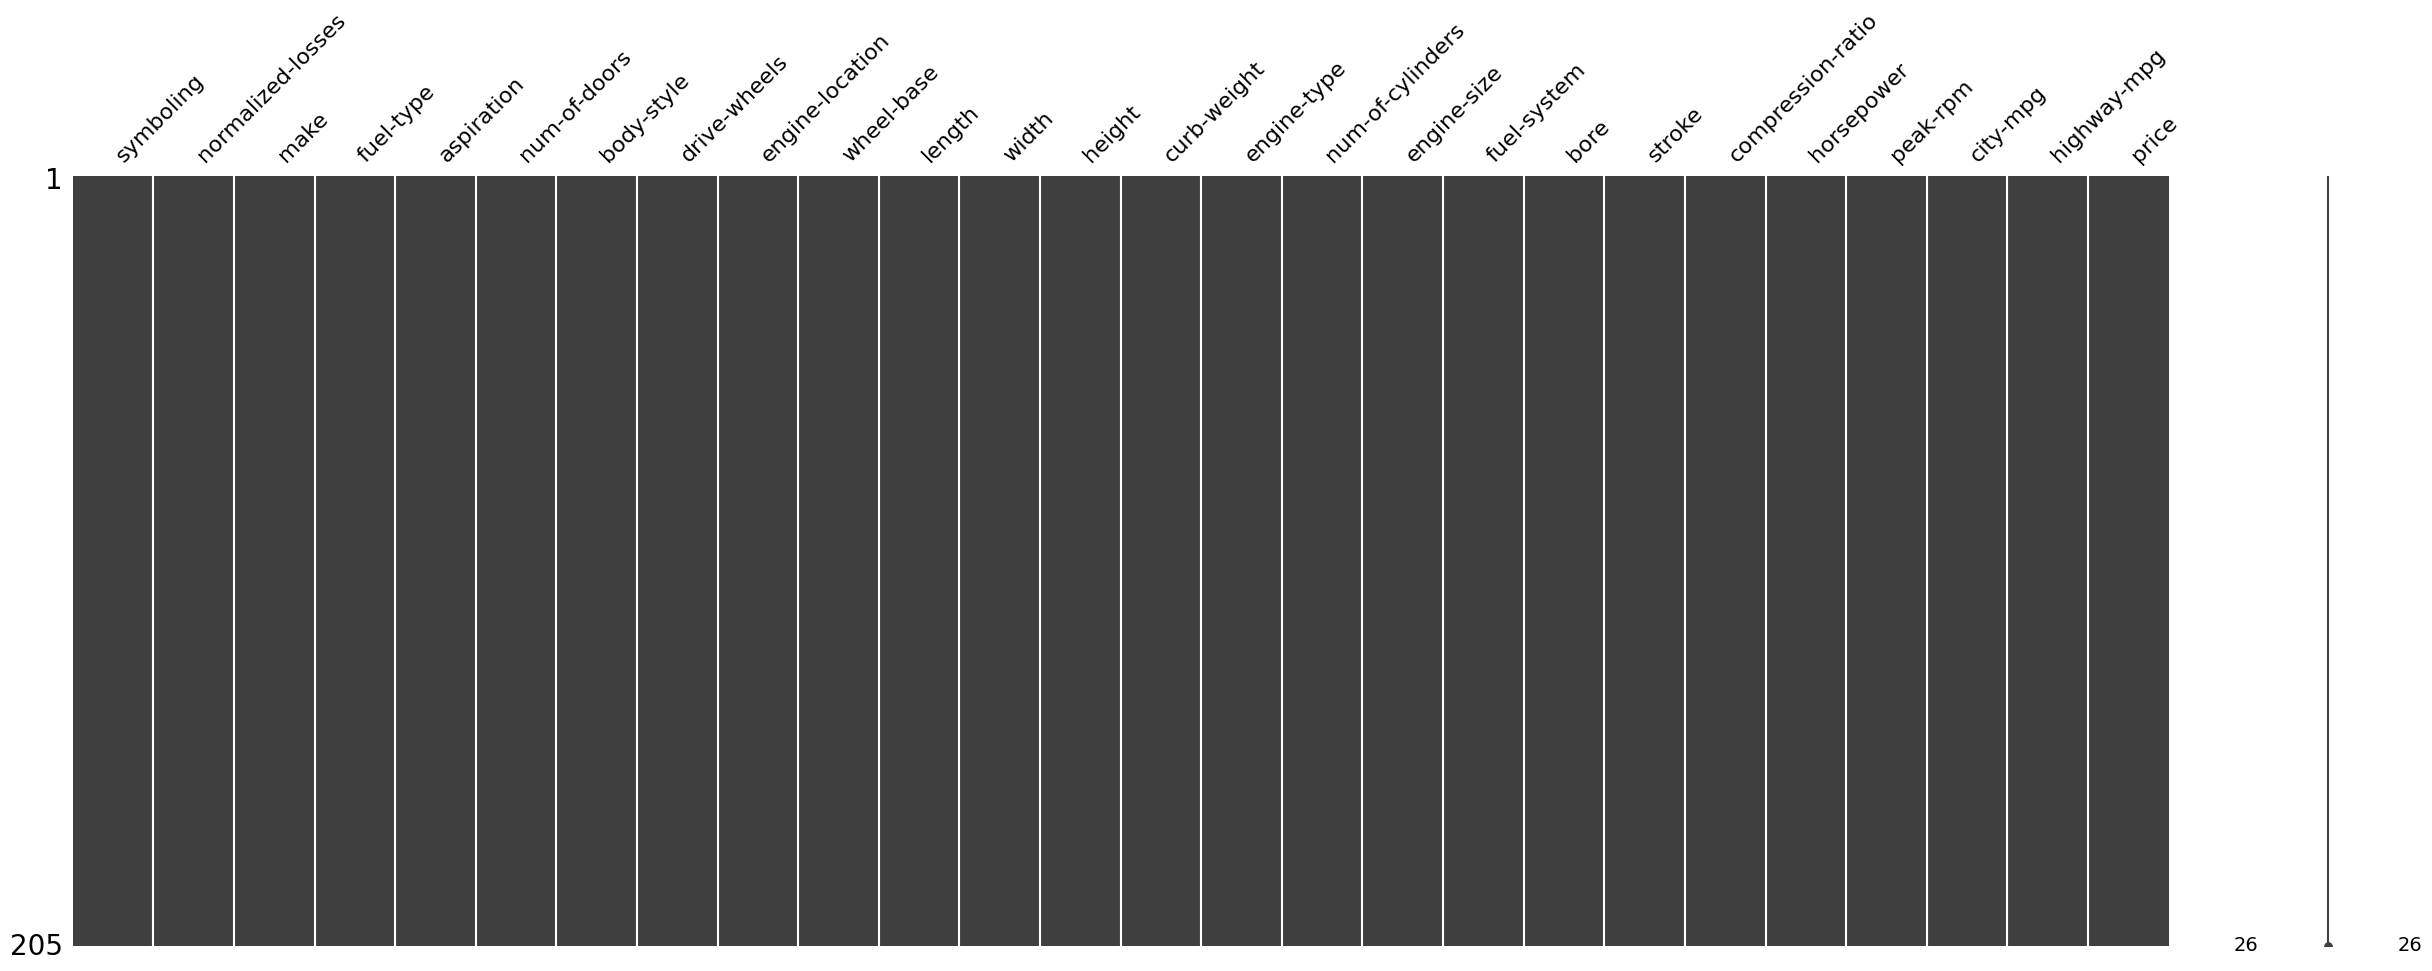

In [15]:
# correcting datatype of 'normalized-losses'
auto_df[['normalized-losses']] = auto_df[['normalized-losses']].astype('int')

# Plot graphic of missing values
missingno.matrix(auto_df, figsize = (30,10));

Now that the missing datapoints have been handled, we can move on to the next step which is the exploratory data analysis. From this we can hope to get some insights about this dataset.

# Data Exploration

First thing to do is to check the make distribution on the dataset, and we can see from the figure below that most of the data collected was from Toyota and the data was collected for twenty two different types of car makes.

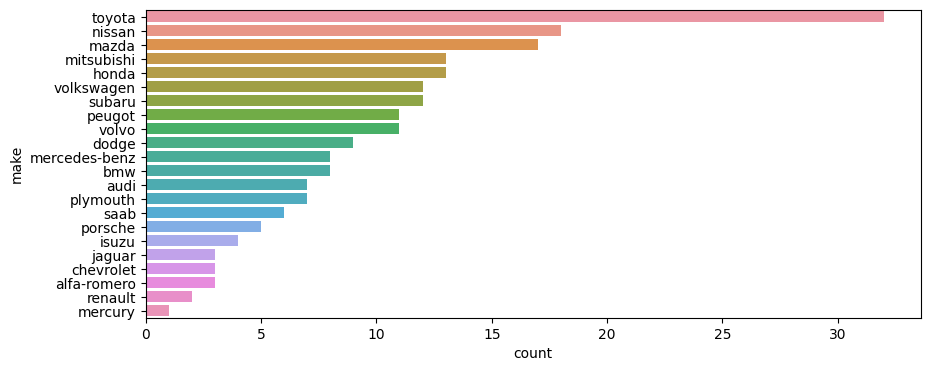

In [16]:
# plot of the make column
fig = plt.figure(figsize=(10,4))
order = auto_df['make'].value_counts().index
sns.countplot(y=auto_df['make'], data=auto_df,order = order);

We can see in the figure below that for the cars that were collected in the dataset a majority of them use gas for fuel while a very small number of them use diesel.

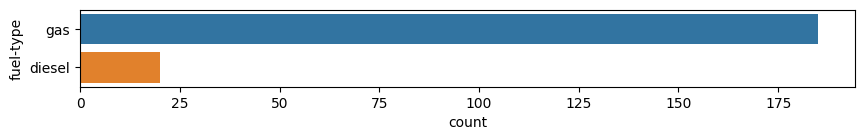

In [17]:
# plot of the fuel-type column
fig = plt.figure(figsize=(10,1))
order = auto_df['fuel-type'].value_counts().index
sns.countplot(y=auto_df['fuel-type'], data=auto_df,order = order);

And a majority of the cars have a standard engine and small number uses turbo engines which gets additional compressed air from turbochargers for more power and enhanced efficiency.

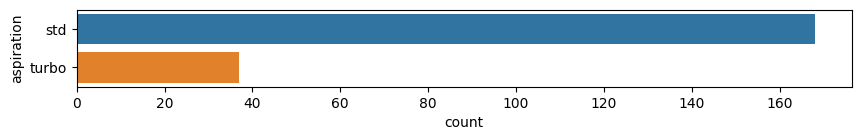

In [18]:
# plot of the num-of-doors column
fig = plt.figure(figsize=(10,1))
order = auto_df['aspiration'].value_counts().index
sns.countplot(y=auto_df['aspiration'], data=auto_df, order=order);

Majority of the cars have four doors but there isn't a significant difference in the number of four doors and two doors cars in the collected dataset.

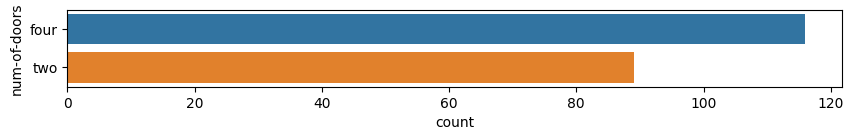

In [19]:
# plot of the num-of-doors column
fig = plt.figure(figsize=(10,1))
order = auto_df['num-of-doors'].value_counts().index
sns.countplot(y=auto_df['num-of-doors'], data=auto_df, order=order);

In the dataset we have five different body-style types for the cars with the sedan and hatchback making up majority of the cars.

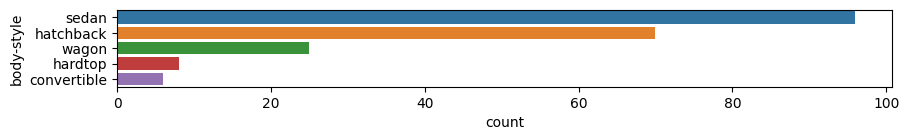

In [20]:
# plot of the num-of-doors column
fig = plt.figure(figsize=(10,1))
order = auto_df['body-style'].value_counts().index
sns.countplot(y=auto_df['body-style'], data=auto_df, order=order);

And we have three different types for drive wheel configurations with the majority of the cars using either a front-wheel drive configuration or a rear-wheel drive configuration.

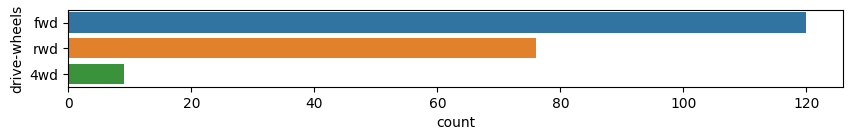

In [21]:
# plot of the drive-wheels column
fig = plt.figure(figsize=(10,1))
order = auto_df['drive-wheels'].value_counts().index
sns.countplot(y=auto_df['drive-wheels'], data=auto_df, order = order);

A significant amount of the cars have a front located engine which are cars that are generally best for consumers while rear located engine cars offer unmatched acceleration.

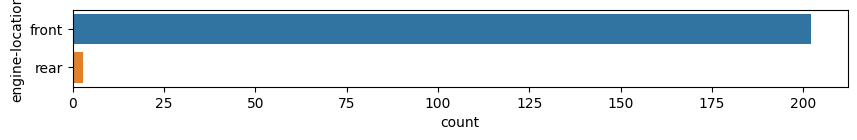

In [22]:
# plot of the num-of-doors column
fig = plt.figure(figsize=(10,1))
sns.countplot(y=auto_df['engine-location'], data=auto_df);

The cars have seven types of engines with the Overhead Camshaft being used in the majority of the cars. With the majority of the cars having engines of sizes 122, 98, 97, 92 and 108, and most of the cars have four cylinder engines.

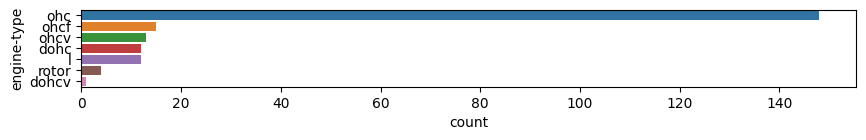

In [23]:
# plot of the num-of-doors column
fig = plt.figure(figsize=(10,1))
order = auto_df['engine-type'].value_counts().index
sns.countplot(y=auto_df['engine-type'], data=auto_df, order = order);

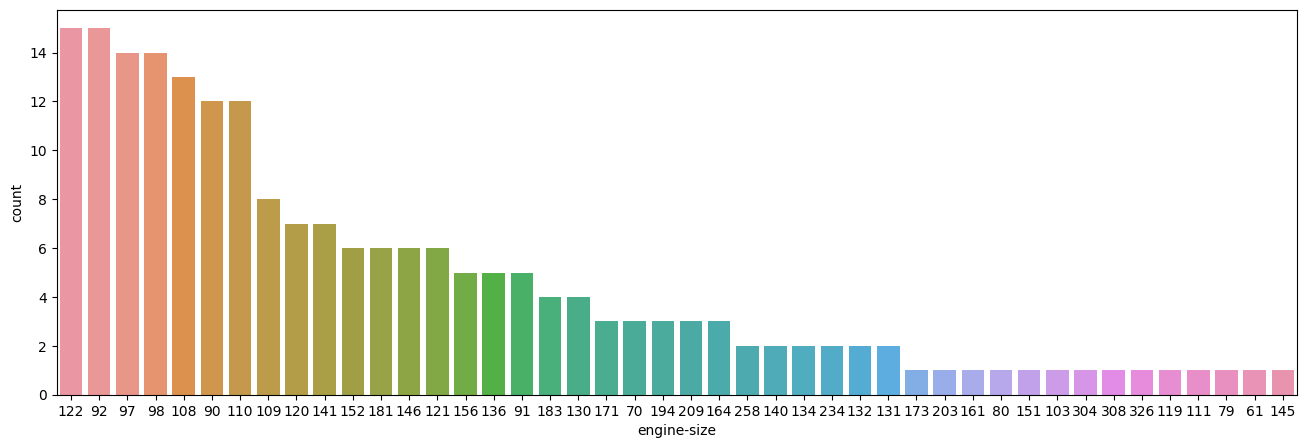

In [24]:
# plot of the num-of-doors column
fig = plt.figure(figsize=(16,5))
order = auto_df['engine-size'].value_counts().index
sns.countplot(x=auto_df['engine-size'], data=auto_df, order = order);

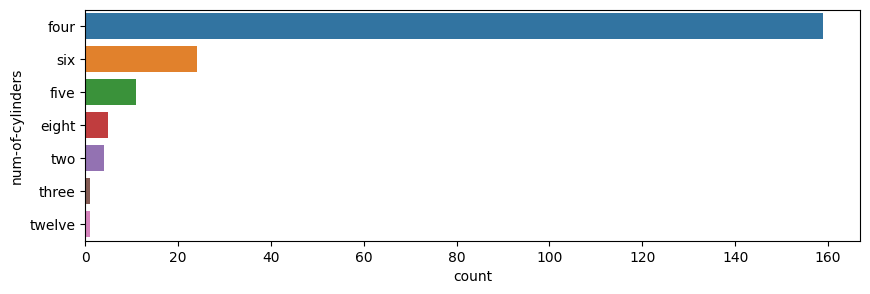

In [25]:
# plot of the num-of-doors column
fig = plt.figure(figsize=(10,3))
order = auto_df['num-of-cylinders'].value_counts().index
sns.countplot(y=auto_df['num-of-cylinders'], data=auto_df, order = order);

The cars have eight types of fuel systems with most cars having either a multi point fuel injection fuel system or a 2bbl fuel system.

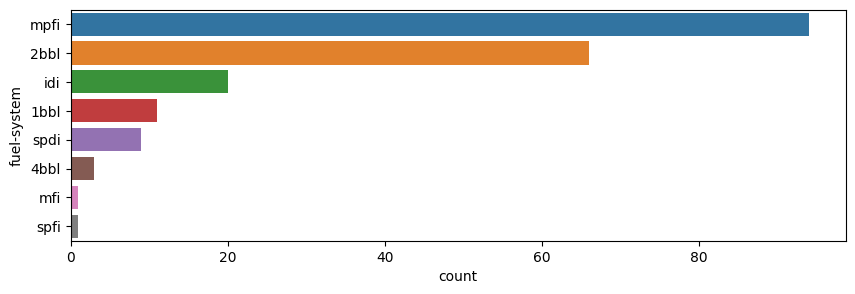

In [26]:
# plot of the num-of-doors column
fig = plt.figure(figsize=(10,3))
order = auto_df['fuel-system'].value_counts().index
sns.countplot(y=auto_df['fuel-system'], data=auto_df, order = order);

Lastly lets look at symboling which is the indication of the cars risk relative to its price. A negative symboling value indicates that the car is less risky and most likely safe while the opposite is true for a positive symboling rate. Below we can see that only a few cars are considered pretty much safe while the majority have varying degrees of risk.

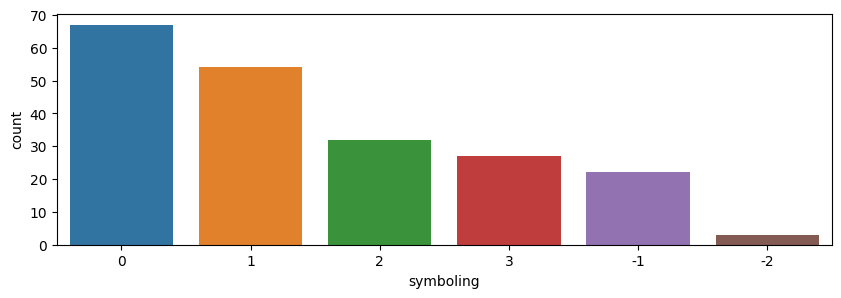

In [27]:
# plot of the num-of-doors column
fig = plt.figure(figsize=(10,3))
order = auto_df['symboling'].value_counts().index
sns.countplot(x=auto_df['symboling'], data=auto_df, order = order);

The above exploration was to give us an idea of what type of data we are working with. From here on I will try to anlayse a few aspects of the columns in the dataset and the questions that I would like to answer are.

- Top 10 most expensive car makes on average?
- How does the engine size relate to price?
- price and horsepower relationship?
- How does peak-rpm affect horsepower?
- How does the engine size relate to horsepower and rpm?
- How does bore and stroke relate to compression ratio?
- Compression ratio and price relationship?
- Driving in the city vs the highway?


So lets begin with the investigation of the above questions and see what insights and information we can be able to extract.

#### Top 10 most expensive car makes on average

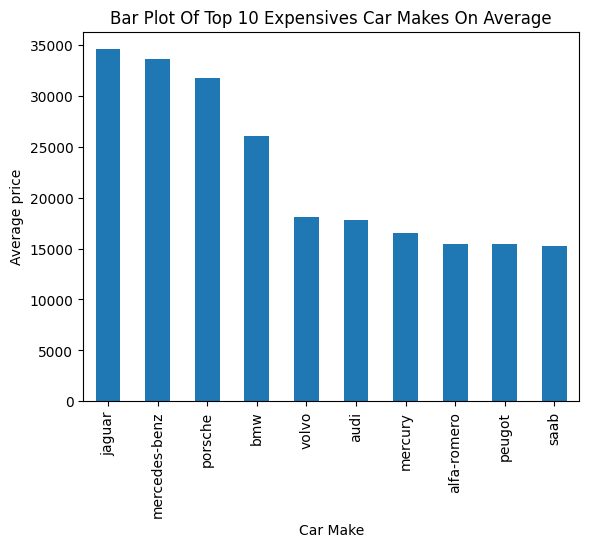

In [45]:
car_price_mean = auto_df.groupby('make')['price'].mean()

car_price_mean = car_price_mean.sort_values(ascending = False)

top_10 = car_price_mean.head(10)

top_10.plot.bar()

# labelling the bar plot
plt.title('Bar Plot Of Top 10 Expensives Car Makes On Average')
plt.ylabel('Average price')
plt.xlabel('Car Make')

plt.show() # showing bar plot

From the figure above we can see the Jaguar is the most expensive make on average. The top 5 most expensive makes on average include the Mercedes-benz, Porsche and BMW. The top also includes makes such as the Peugot, Alfa-romero and the Saab.

#### How does the engine-size relate to price?

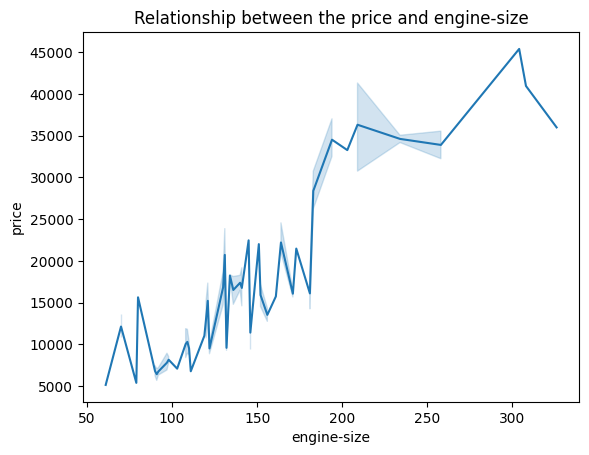

In [35]:
# plotting the line plot figure with seaborn
plt.figure()
sns.lineplot(x = 'engine-size', y = 'price', data = auto_df)

# plot title
plt.title('Relationship between the price and engine-size')

plt.show() # displaying the lineplot

From the lineplot figure above it can be concluded that the relationship has a positive increasing gradient, which means that in general the price of the car increases with the increase in the in engine-size. The bigger the engine the more expensive the car.

#### price and horsepower relationship?

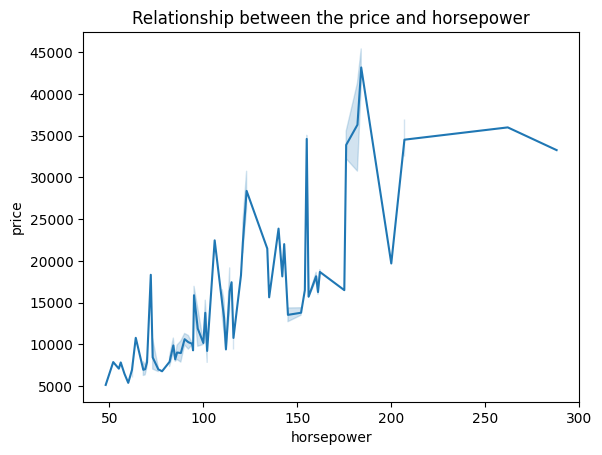

In [36]:
# plotting the line plot figure with seaborn
plt.figure()
sns.lineplot(x = 'horsepower', y = 'price', data = auto_df)

# plot title
plt.title('Relationship between the price and horsepower')

plt.show() # displaying the lineplot

From the figure above it can be concluded that a car with more horsepower will be  a more expensive car make. The relationship in the lineplot has positive gradient.

#### How does peak-rpm affect horsepower ?

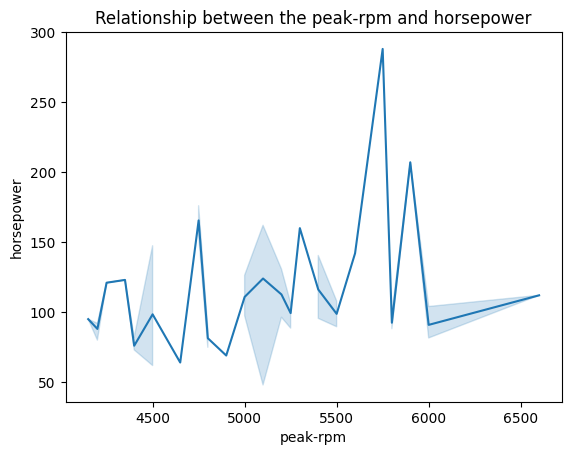

In [37]:
# plotting the line plot figure with seaborn
plt.figure()
sns.lineplot(x = 'peak-rpm', y = 'horsepower', data = auto_df)

# plot title
plt.title('Relationship between the peak-rpm and horsepower')

plt.show() # displaying the lineplot

The relation between peak-rpm and the horsepower seems to have a random relationship (fluctuates), it cannot be concluded that with an increase in rpm that the results in horsepower will be favourable.

#### How does the engine size relate to horsepower and peak-rpm?

From the figure below it can be concluded that engine-size has a strong correlation with horsepower and thus we can conclude that with a bigger engine-size the horsepower will likely be more. But we can also conclude that the correlation  between engine-size and peak-rpm is weak and in the negative direction.

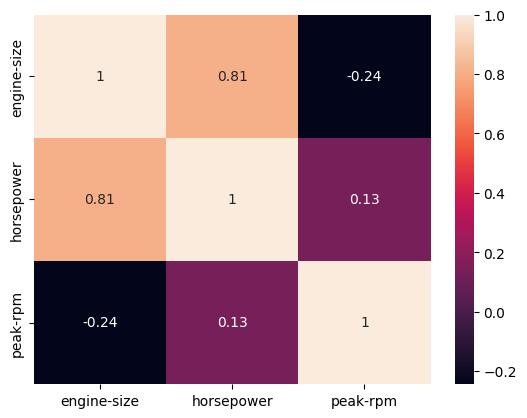

In [39]:
# getting 'engine-size','horsepower','peak-rpm' columns
price_points = auto_df[['engine-size','horsepower','peak-rpm']]

# plotting a correlation matrix
plt.figure()

corr_coeff_mat = price_points.corr()
sns.heatmap(corr_coeff_mat, annot=True)

plt.show() 
plt.close()

Another thing to note is that the correlation between horsepower and peak-rpm is weak, which em-phasises the finding from before, that with an increase in rpm the results in horsepower will be likely be  unfavourable.

#### How does bore and stroke relate to compression ratio?

There is weak correlation between the compression-ratio and the stroke, and nearly no correlation between the compression-ratio and the bore of the car. The bore and stroke have a negative correlation which is also nearly zero, so these two variables also nearly have no relationship.

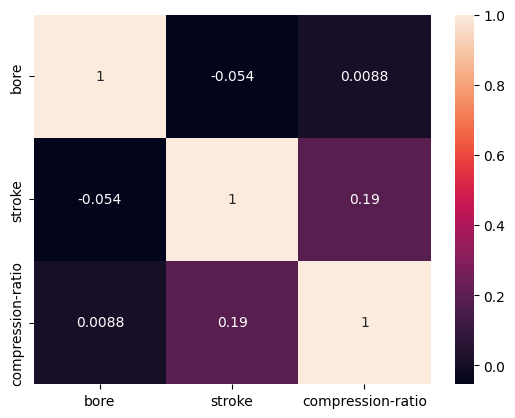

In [42]:
# getting 'engine-size','horsepower','peak-rpm' columns
price_points = auto_df[['price','compression-ratio']]

# plotting a correlation matrix
plt.figure()

corr_coeff_mat = price_points.corr()
sns.heatmap(corr_coeff_mat, annot=True)

plt.show() 
plt.close()

#### Compression ratio and price relationship?

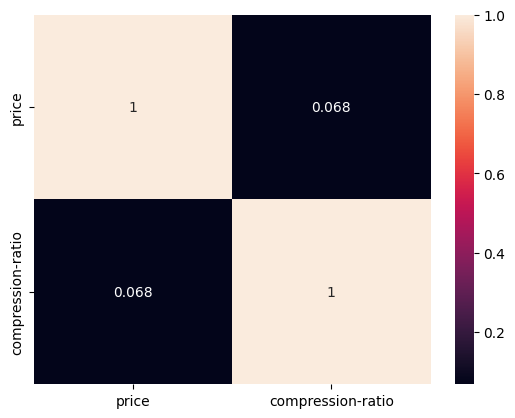

In [47]:
# getting 'engine-size','horsepower','peak-rpm' columns
price_points = auto_df[['price','compression-ratio']]

# plotting a correlation matrix
plt.figure()

corr_coeff_mat = price_points.corr()
sns.heatmap(corr_coeff_mat, annot=True)

plt.show() 
plt.close()

From the results above we can conclude that the compression-ratio of the car does not really affect the pricing, the correlation is positive but we can also declare it as no correlation as there is very little.

#### Driving in the city vs the highway?

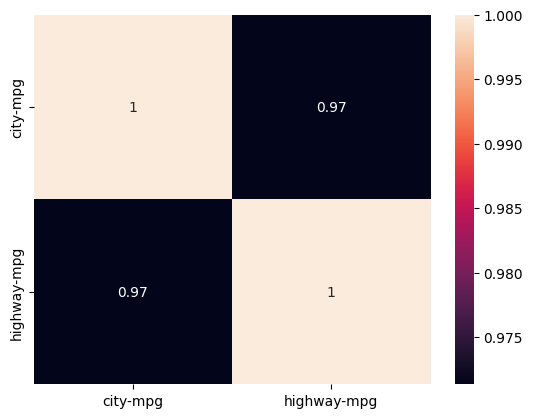

In [48]:
# getting 'engine-size','horsepower','peak-rpm' columns
price_points = auto_df[['city-mpg','highway-mpg']]

# plotting a correlation matrix
plt.figure()

corr_coeff_mat = price_points.corr()
sns.heatmap(corr_coeff_mat, annot=True)

plt.show() 
plt.close()

From the figure above we can conclude that there is not much difference between driving in the city and driving in the highway. The correlation between the two variables is nearly perfect and hence the conclusion.